In [1]:
from pathlib import Path
from collections import defaultdict

import pandas as pd
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster

In [2]:
import sys
sys.path.append('../src')

from tree import PairwiseDistanceMatrix, Dendrogram

In [3]:
dirpath = Path('/home/chen1i6c04/cgmlst_type/new')

generator = (pd.read_csv(filepath, sep='\t', index_col=0, header=0, names=[filepath.stem]) for filepath in dirpath.iterdir())
profile = pd.concat(generator, axis=1)

In [5]:
%%time
distmatrix = PairwiseDistanceMatrix(profile)()

CPU times: user 6min 26s, sys: 7.5 s, total: 6min 33s
Wall time: 6min 34s


In [6]:
condensed_distance_matrix = squareform(distmatrix)

In [7]:
labels = fcluster(linkage(condensed_distance_matrix), criterion='distance', t=6)

In [9]:
clusters = defaultdict(list)

for member, label in zip(profile.columns, labels):
    clusters[label].append(member)

In [10]:
len(clusters)

7594

In [ ]:
len(groups)

In [23]:
sub_pdist = pdist.filter(groups[11], axis=0).filter(groups[11], axis=1)

In [25]:
dendrogram = Dendrogram(sub_pdist)

In [28]:
dendrogram(show_node_info=True)

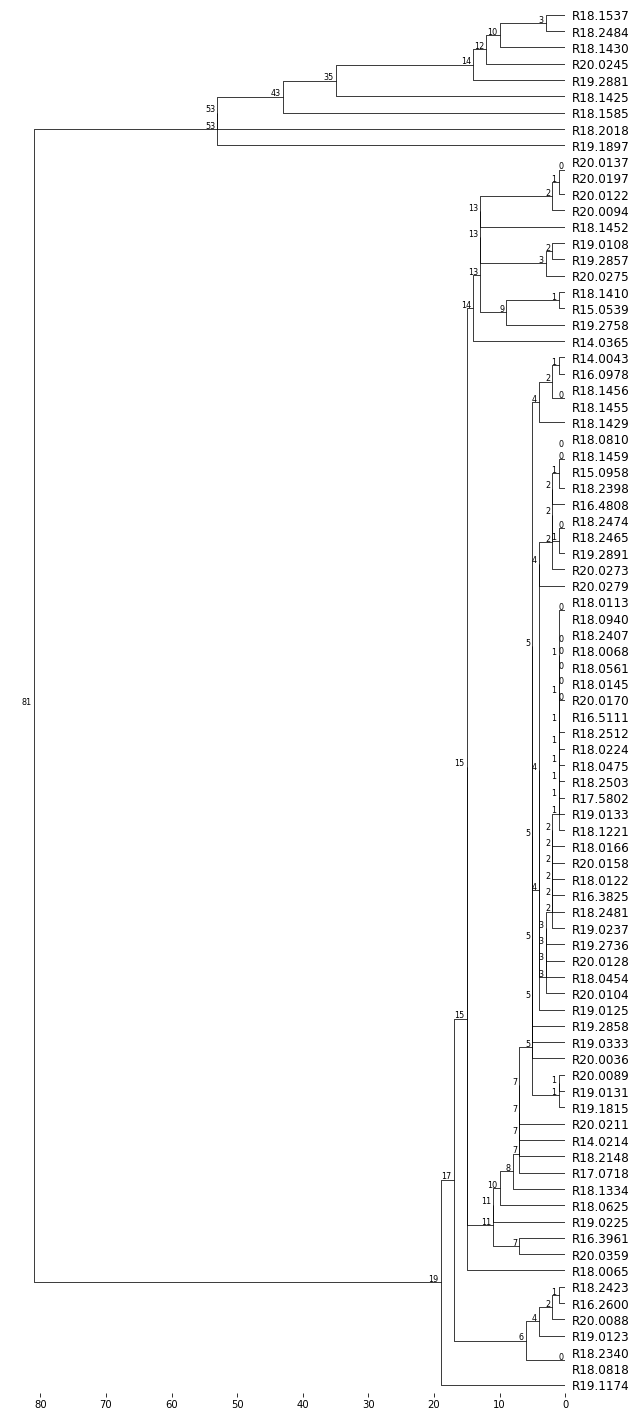

In [29]:
dendrogram.show_figure